# Air Quality Data Exploration
This notebook is focused on exploring the air quality data stored in a PostgreSQL database. We will:
- Load the necessary libraries
- Connect to the PostgreSQL database
- Retrieve the air quality data into a pandas DataFrame
- Perform initial data exploration and processing

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
)
from tqdm import tqdm

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [2]:
try:
    # Establishing the connection
    connection = psycopg2.connect(
        dbname="AirQualityDB",
        user="root",
        password="root",
        host="localhost",
        port="5432"
    )

    # Using a cursor to execute a query
    with connection.cursor() as cursor:
        cursor.execute('SELECT * FROM "AirQuality"')
        
        rows = cursor.fetchall()

        colnames = [desc[0] for desc in cursor.description]

        df = pd.DataFrame(rows, columns=colnames)
        df.drop('index', axis=1, inplace=True)

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    if connection:
        connection.close()

In [3]:
tqdm.pandas()

# Initial Data Exploration
We will now explore the structure of the DataFrame to understand the data better. 

## Checking DataFrame Shape
Here we check the dimensions of the DataFrame to understand the size of the dataset.

In [4]:
# Display the shape of the DataFrame (rows, columns)
df.shape

(9357, 15)

## Displaying the First Few Rows
We will now display the first few rows of the DataFrame to get an overview of the data.

In [5]:
# Display the first few rows of the DataFrame
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9         1046.0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4          955.0    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0          939.0    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2          948.0    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5          836.0    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888

## Summary Statistics
Next, we will generate summary statistics for the DataFrame to understand the distribution of numerical features.

In [6]:
# Generate summary statistics for the DataFrame
df.describe().T

count                           mean                  min                  25%                  50%                  75%                  max         std
Date             9357  2004-09-21 04:30:05.193972480  2004-03-10 00:00:00  2004-06-16 00:00:00  2004-09-21 00:00:00  2004-12-28 00:00:00  2005-04-04 00:00:00         NaN
CO(GT)         9357.0                     -34.207524               -200.0                  0.6                  1.5                  2.6                 11.9    77.65717
PT08.S1(CO)    9357.0                    1048.990061               -200.0                921.0               1053.0               1221.0               2040.0   329.83271
NMHC(GT)       9357.0                    -159.090093               -200.0               -200.0               -200.0               -200.0               1189.0  139.789093
C6H6(GT)       9357.0                       1.865683               -200.0                  4.0                  7.9                 13.6                 63.7   41.380206
PT08.S2(NMHC)  9357.0                     894.595276               -200.0                711.0                895.0               1105.0               2214.0  342.333252
NOx(GT)        9357.0                     168.616971               -200.0                 50.0                141.0                284.0               1479.0  257.433866
PT08.S3(NOx)   9357.0                     794.990168               -200.0                637.0                794.0                960.0               2683.0  321.993552
NO2(GT)        9357.0                      58.148873               -200.0                 53.0                 96.0                133.0                340.0  126.940455
PT08.S4(NO2)   9357.0                    1391.479641               -200.0               1185.0               1446.0               1662.0               2775.0  467.210125
PT08.S5(O3)    9357.0                     975.072032               -200.0                700.0                942.0               1255.0               2523.0  456.938184
T              9357.0                       9.778305               -200.0                 10.9                 17.2                 24.1                 44.6   43.203623
RH             9357.0                       39.48538               -200.0                 34.1                 48.6                 61.9                 88.7   51.216145
AH             9357.0                      -6.837604               -200.0               0.6923               0.9768               1.2962                2.231    38.97667

## Understanding the Missing Values

In [7]:
# knowing the null values

df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

However we know that all the missing values are replace by $-200$. Then, we will replace this number by the missing values symbol `np.NaN`

In [8]:
df.replace(-200, np.NaN, inplace=True)

In [9]:
# knowing the null values

df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

We will create a heatmap to visualize missing values in the DataFrame.

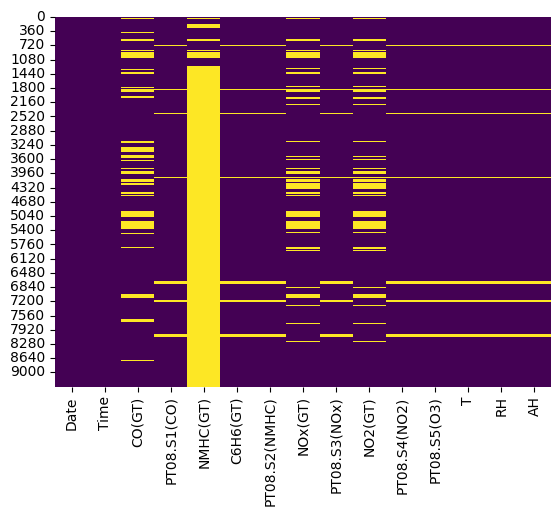

In [10]:
# Create a heatmap to visualize missing values in the DataFrame
sns.heatmap(df.isnull(), cbar=False, cmap='viridis');

## Imputing Missing Values 

In [11]:
# Noting the missing values percentage for feature

((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

NMHC(GT)         90.231912
CO(GT)           17.986534
NO2(GT)          17.548360
NOx(GT)          17.516298
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
PT08.S3(NOx)      3.911510
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
Date              0.000000
Time              0.000000
dtype: float64

Knowing the data types for all the features

In [12]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [13]:
# saving missing values in a variable

missing_values = (df.isnull().sum())/len(df)*100

In [14]:
missing_values

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [15]:
# saving column names in a variable for the numerical features

columns_df = list(df.select_dtypes(include=['float64','int64']).columns)

In [16]:
# new variable to store variables having missing values less than a threshold

variables = [ ]
for column in columns_df:
    if missing_values[column] < 60: # setting the threshold as 60%
        variables.append(column)

In [17]:
NON_CONSIDERED_FEATURES = [feature for feature in columns_df if feature not in variables]

NON_CONSIDERED_FEATURES

['NMHC(GT)']

In [18]:
df[variables] = df[variables].progress_apply(lambda x: x.fillna(x.median()))

100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1924.95it/s]


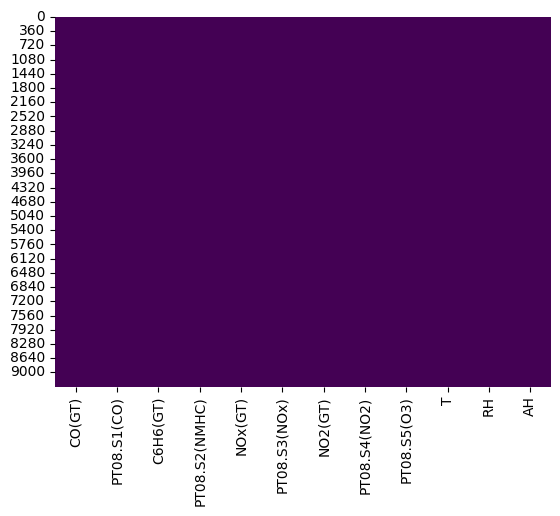

In [19]:
# Create a heatmap to visualize missing values in the DataFrame
sns.heatmap(df[variables] .isnull(), cbar=False, cmap='viridis');

We observe that the feature `NMHC(GT)` was not considered:

In [20]:
# Generate summary statistics for the DataFrame
df[variables].describe().T

count         mean         std       min        25%        50%        75%       max
CO(GT)         9357.0     2.089302    1.323024    0.1000     1.2000     1.8000     2.6000    11.900
PT08.S1(CO)    9357.0  1098.392433  212.911465  647.0000   941.0000  1063.0000  1221.0000  2040.000
C6H6(GT)       9357.0    10.009447    7.311771    0.1000     4.6000     8.2000    13.6000    63.700
PT08.S2(NMHC)  9357.0   937.973923  261.625561  383.0000   743.0000   909.0000  1105.0000  2214.000
NOx(GT)        9357.0   235.178903  195.091025    2.0000   112.0000   180.0000   284.0000  1479.000
PT08.S3(NOx)   9357.0   834.339959  251.808888  322.0000   666.0000   806.0000   960.0000  2683.000
NO2(GT)        9357.0   112.373303   43.948519    2.0000    86.0000   109.0000   133.0000   340.000
PT08.S4(NO2)   9357.0  1456.528054  339.370072  551.0000  1242.0000  1463.0000  1662.0000  2775.000
PT08.S5(O3)    9357.0  1020.562894  390.784960  221.0000   742.0000   963.0000  1255.0000  2523.000
T              9357.0    18.297574    8.658221   -1.9000    12.0000    17.8000    24.1000    44.600
RH             9357.0    49.248509   16.974949    9.2000    36.6000    49.6000    61.9000    88.700
AH             9357.0     1.024352    0.395878    0.1847     0.7461     0.9954     1.2962     2.231

---

<center><h1>💻💻 Data Preparation 💻 💻</h1></center>

---

ORIGINAL_FEATURES = list(df_train.columns)

with open('data/ORIGINAL_FEATURES', 'wb') as fp0:
    pickle.dump(ORIGINAL_FEATURES, fp0)

## Feature Engineering

Data date and time types. We leverage the `Date` to create others:

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [22]:
date_features = pd.DataFrame(
    {
        "day": df["Date"].dt.day,
        "year": df["Date"].dt.year,
        "quarter": df["Date"].dt.quarter,
        "month": df["Date"].dt.month,
        "weekday": df["Date"].dt.dayofweek,
        "week_year": df["Date"].dt.isocalendar().week,
    }
)

In [23]:
date_features

day  year  quarter  month  weekday  week_year
0      10  2004        1      3        2         11
1      10  2004        1      3        2         11
2      10  2004        1      3        2         11
3      10  2004        1      3        2         11
4      10  2004        1      3        2         11
...   ...   ...      ...    ...      ...        ...
9352    4  2005        2      4        0         14
9353    4  2005        2      4        0         14
9354    4  2005        2      4        0         14
9355    4  2005        2      4        0         14
9356    4  2005        2      4        0         14

[9357 rows x 6 columns]

In [24]:
df = pd.concat([df[variables], date_features], axis=1)
df.shape

(9357, 18)

In [25]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
day                int32
year               int32
quarter            int32
month              int32
weekday            int32
week_year         UInt32
dtype: object

In [26]:
df.sample(3)

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  day  year  quarter  month  weekday  week_year
8970     2.2       1242.0       8.9          935.0    297.0         584.0    164.0        1327.0       1127.0  15.8  51.3  0.9144   19  2005        1      3        5         11
2151     5.0       1346.0      27.1         1481.0    441.0         602.0    174.0        2367.0       1681.0  23.9  44.4  1.3029    8  2004        2      6        1         24
221      2.1       1215.0       8.3          912.0    127.0         948.0    109.0        1547.0        993.0  14.2  58.3  0.9380   19  2004        1      3        4         12

## Univariate Analysis: Numerical Variables

We only need to see that all the features are numeric. Therefore we are able to consider all the features and transform in the same data type, namely, `float`.

In [27]:
df = df.astype(float)

In [28]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
day              float64
year             float64
quarter          float64
month            float64
weekday          float64
week_year        float64
dtype: object

In [29]:
df.sample(3)

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH   day    year  quarter  month  weekday  week_year
3407     1.8       1118.0      13.0         1084.0    104.0         684.0    127.0        1723.0        838.0  38.2  21.8  1.4312  30.0  2004.0      3.0    7.0      4.0       31.0
4344     3.3       1120.0      16.0         1181.0    180.0         653.0    109.0        1604.0       1028.0  31.1  21.0  0.9337   7.0  2004.0      3.0    9.0      1.0       37.0
970      1.8        802.0       1.2          519.0    180.0        1523.0    109.0        1315.0        540.0   9.8  80.0  0.9670  20.0  2004.0      2.0    4.0      1.0       17.0

In [30]:
df_columns = list(df.columns)

with open('data/NUMERICAL_FEATURES', 'wb') as fp6:
    pickle.dump(NUMERICAL_FEATURES, fp6)

We use now the following function to see the distribution associated to all the features:

In [31]:
# custom function for easy and efficient analysis of numerical univariate


def UVA_numeric(data, var_group):
    """
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    """

    size = len(var_group)
    plt.figure(figsize=(7 * size, 3), dpi=100)

    # looping for each variable
    for j, i in enumerate(var_group):

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.kdeplot(x=data[i], shade=True)
        sns.lineplot(x=points, y=[0, 0], color="black", label="std_dev")
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color="orange", label="min/max")
        sns.scatterplot(x=[mean], y=[0], color="red", label="mean")
        sns.scatterplot(x=[median], y=[0], color="blue", label="median")
        plt.xlabel("{}".format(i), fontsize=20)
        plt.ylabel("density")
        plt.title(
            "within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}".format(
                (round(points[0], 2), round(points[1], 2)),
                round(kurt, 2),
                round(skew, 2),
                (round(mini, 2), round(maxi, 2), round(ran, 2)),
                round(mean, 2),
                round(median, 2),
            )
        )


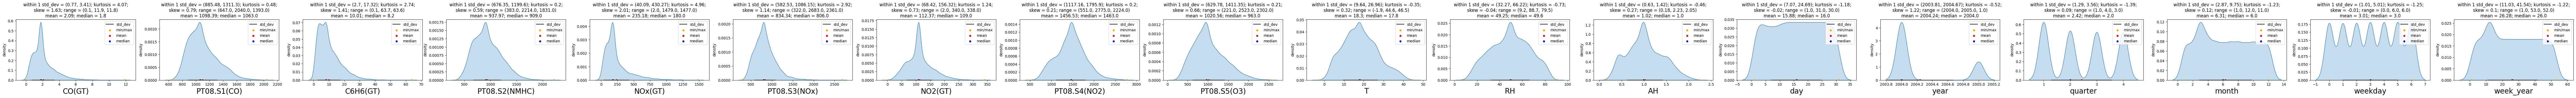

In [32]:
UVA_numeric(df, df_columns)

### Univariate Analysis: Outliers

We now perform a study of the outliers for all the dataset:

In [33]:
# custom function for easy outlier analysis


def UVA_outlier(data, var_group, include_outlier=True):
    """
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    """

    size = len(var_group)
    plt.figure(figsize=(7 * size, 4), dpi=100)

    # looping for each variable
    for j, i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = med - (1.5 * IQR)
        whis_high = med + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        if include_outlier == True:
            print(include_outlier)
            # Plotting the variable with every information
            plt.subplot(1, size, j + 1)
            sns.boxplot(data[i], orient="v")
            plt.ylabel("{}".format(i))
            plt.title(
                "With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n".format(
                    round(IQR, 2),
                    round(med, 2),
                    (round(quant25, 2), round(quant75, 2)),
                    (outlier_low, outlier_high),
                )
            )

        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i] > whis_high] = whis_high + 1
            data2[i][data2[i] < whis_low] = whis_low - 1

            # plotting without outliers
            plt.subplot(1, size, j + 1)
            sns.boxplot(data2[i], orient="v")
            plt.ylabel("{}".format(i))
            plt.title(
                "Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n".format(
                    round(IQR, 2),
                    round(med, 2),
                    (round(quant25, 2), round(quant75, 2)),
                    (outlier_low, outlier_high),
                )
            )

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


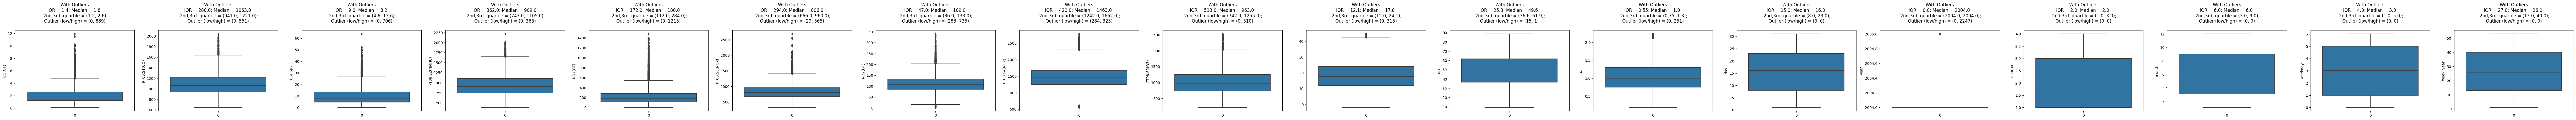

In [34]:
UVA_outlier(df, df_columns,)

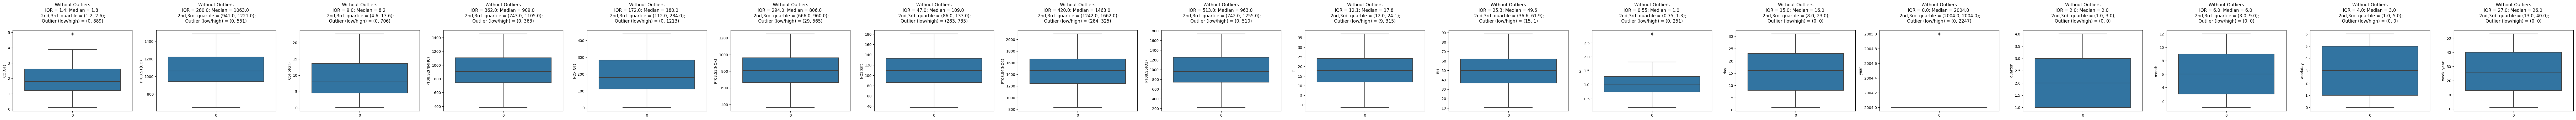

In [35]:
UVA_outlier(df, df_columns, False)

### Dealing with the outliers:

In order to deal with the outliers we use the *Winsorization* method, which is a useful technique when we want to reduce the influence of outliers without removing data points entirely. It is particularly valuable in statistical analysis and predictive modeling, where outliers can disproportionately affect the results.

In [36]:
from scipy.stats.mstats import winsorize

We create a new set of columns having only the Winsorizaion method applied:

In [37]:
for feature in df_columns:
    df[feature+'_winsor'] = winsorize(df[feature], limits=[0.025, 0.025])

For example we observe changes in the distributions:

In [38]:
df[['CO(GT)', 'CO(GT)_winsor', 'NO2(GT)', 'NO2(GT)_winsor', 'C6H6(GT)', 'C6H6(GT)_winsor']].describe().T

count        mean        std   min   25%    50%    75%    max
CO(GT)           9357.0    2.089302   1.323024   0.1   1.2    1.8    2.6   11.9
CO(GT)_winsor    9357.0    2.064080   1.215038   0.4   1.2    1.8    2.6    5.6
NO2(GT)          9357.0  112.373303  43.948519   2.0  86.0  109.0  133.0  340.0
NO2(GT)_winsor   9357.0  111.916106  41.516547  36.0  86.0  109.0  133.0  216.0
C6H6(GT)         9357.0   10.009447   7.311771   0.1   4.6    8.2   13.6   63.7
C6H6(GT)_winsor  9357.0    9.870674   6.789745   1.2   4.6    8.2   13.6   28.3

In [39]:
df_columns_winsor = [feature+'_winsor' for feature in df_columns]

# with open('data/NUMERICAL_FEATURES_WINSOR', 'wb') as fp7:
#    pickle.dump(NUMERICAL_FEATURES_WINSOR, fp7)

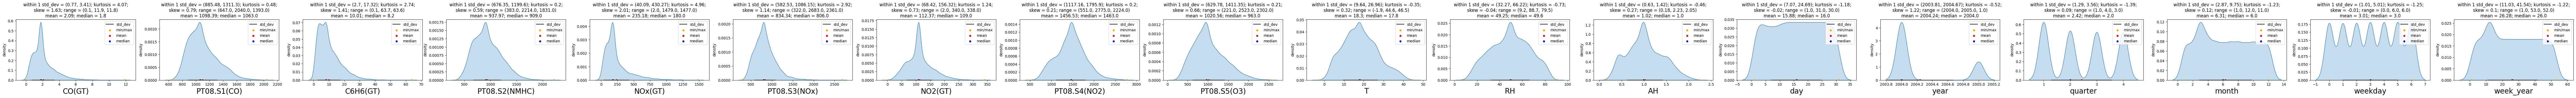

In [40]:
UVA_numeric(df,  df_columns)

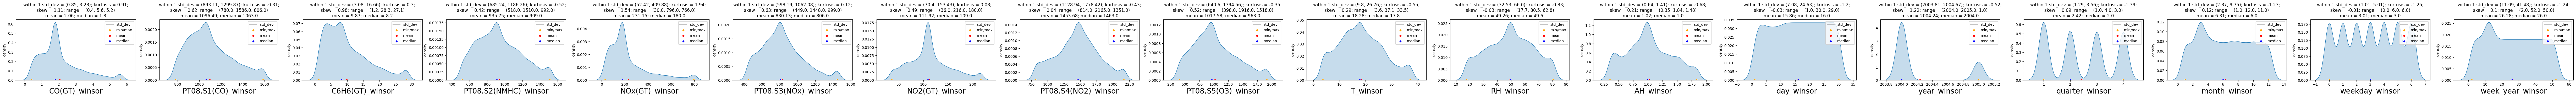

In [41]:
UVA_numeric(df, df_columns_winsor)

In [42]:
df.shape

(9357, 36)

We then consider the following dataset:

# Key-transformations: Log + Standard Scaler + Min_Max Scaler

The combination of Log Transformation, Standard Scaler, and Min-Max Scaler is often used in data preprocessing to prepare data for machine learning models.

In [43]:
df_winsor = df[df_columns_winsor]

In [44]:
df_winsor.sample()

CO(GT)_winsor  PT08.S1(CO)_winsor  C6H6(GT)_winsor  PT08.S2(NMHC)_winsor  NOx(GT)_winsor  PT08.S3(NOx)_winsor  NO2(GT)_winsor  PT08.S4(NO2)_winsor  PT08.S5(O3)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  month_winsor  weekday_winsor  week_year_winsor
5298            1.8               960.0              6.8                 848.0           180.0                866.0           109.0               1305.0               701.0      21.6       39.9     1.0156        17.0       2004.0             4.0          10.0             6.0              42.0

NUMERICAL_FEATURE2 = numerical

with open('data/NUMERICAL_FEATURE2', 'wb') as fp9:
    pickle.dump(NUMERICAL_FEATURE2, fp9)

In [45]:
df_winsor.shape

(9357, 18)

## Log Transformation:

We use the `log` transformation to reduce the skewness of the data. It help make distributions more symmetric. It compresses the range of the data by reducing the impact of outliers and brings the data closer to a normal distribution.

In [46]:
df_log = np.log1p(abs(df_winsor))

## Standard Scaler:

We use `StandardScaler` to transform the data to have a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms that assume or perform better when features are centered around zero. It standardizes the range of continuous features, which can improve the performance of many algorithms.

In [47]:
std_train = StandardScaler()
df_scaled = std_train.fit_transform(df_log)
df_scaled = pd.DataFrame(df_scaled, columns=df_columns_winsor)

## Min-Max Scaler:

`Min-Max Scaler` scales each feature to $0$ and $1$. Thus, it rescales the data to fit within a specific range, making it easier to compare different features on the same scale.

In [48]:
min_max_train = MinMaxScaler()
df_min_max = min_max_train.fit_transform(df_scaled)
df_min_max = pd.DataFrame(df_min_max, columns=df_columns_winsor)

## Comparing the distributions

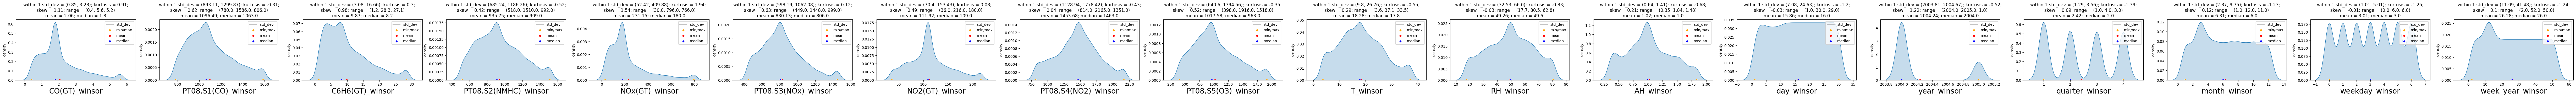

In [49]:
UVA_numeric(df_winsor, df_columns_winsor)

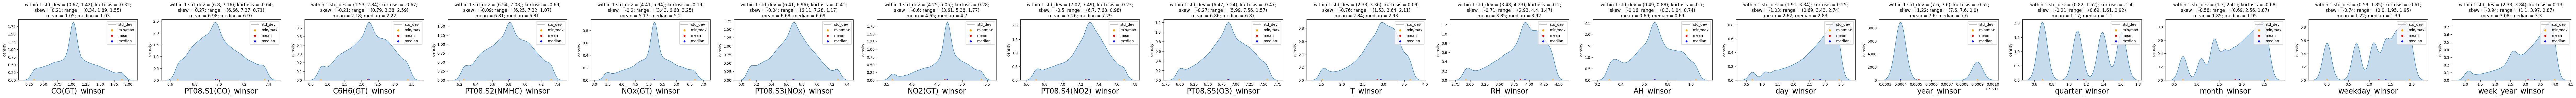

In [50]:
UVA_numeric(df_log, df_columns_winsor)

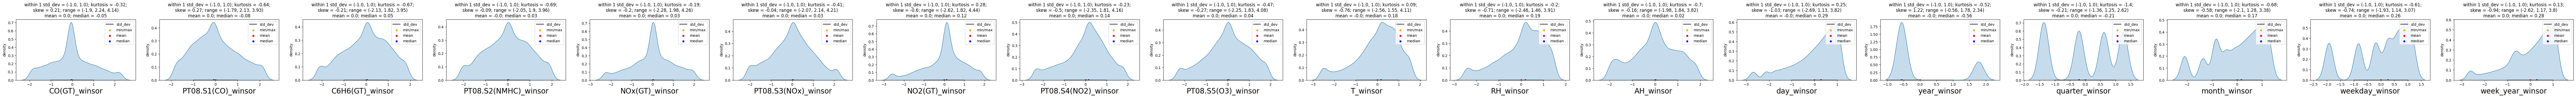

In [51]:
UVA_numeric(df_scaled, df_columns_winsor)

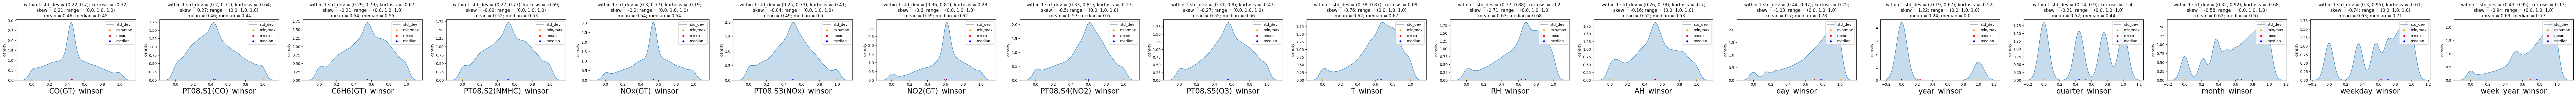

In [52]:
UVA_numeric(df_min_max, df_columns_winsor)

# Feature elimination methods

## High correlation filtering

We use *High correlation filtering* to identify and remove features that are highly correlated with each other. When two features are highly correlated, they carry redundant information, which can lead to multicollinearity in linear models.

In [53]:
# creating the correlation matrix
corr_matrix = df_min_max[df_columns_winsor].corr().abs()

In [54]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

In [55]:
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort",ascending = False)
so = pd.DataFrame(so, columns=['Pearson Correlation'])

In [56]:
so[so['Pearson Correlation']<1].head(10)

Pearson Correlation
PT08.S2(NMHC)_winsor C6H6(GT)_winsor                  0.999390
C6H6(GT)_winsor      PT08.S2(NMHC)_winsor             0.999390
month_winsor         week_year_winsor                 0.959431
week_year_winsor     month_winsor                     0.959431
month_winsor         quarter_winsor                   0.945947
quarter_winsor       month_winsor                     0.945947
                     week_year_winsor                 0.895944
week_year_winsor     quarter_winsor                   0.895944
PT08.S2(NMHC)_winsor PT08.S1(CO)_winsor               0.886759
PT08.S1(CO)_winsor   PT08.S2(NMHC)_winsor             0.886759

For higher correlation filter conditions we have that the 'MedianStudentsPerTeacher' feature it will be not consider in the sequel:

In [57]:
# fining index of variables with correlation greater than the threshold
TO_DROP = [column for column in upper.columns if any(upper[column] > 0.8)]

In [58]:
len(TO_DROP)

7

In [59]:
TO_DROP

['C6H6(GT)_winsor',
 'PT08.S2(NMHC)_winsor',
 'PT08.S3(NOx)_winsor',
 'NO2(GT)_winsor',
 'PT08.S5(O3)_winsor',
 'month_winsor',
 'week_year_winsor']

In [60]:
numerical_consider = [x for x in df_columns_winsor if x not in TO_DROP]

We desire to perform models from NO2 instead of CO. Therefore we proceed as follows:

In [61]:
numerical_consider.append('NO2(GT)_winsor')
numerical_consider.remove('NOx(GT)_winsor')

In [62]:
numerical_consider

['CO(GT)_winsor',
 'PT08.S1(CO)_winsor',
 'PT08.S4(NO2)_winsor',
 'T_winsor',
 'RH_winsor',
 'AH_winsor',
 'day_winsor',
 'year_winsor',
 'quarter_winsor',
 'weekday_winsor',
 'NO2(GT)_winsor']

## Low variance filter

On the other hand, low variance filtering involves removing features that have little to no variance, meaning they do not vary much across samples. Features with very low variance are typically not useful because they contain little information that can help distinguish between different classes or predict the target variable.

In [63]:
from sklearn.preprocessing import normalize

In [64]:
normalize = normalize(df_min_max[numerical_consider])

In [65]:
data_scaled = pd.DataFrame(normalize)

In [66]:
# storing the variance and name of variables
variance = data_scaled.var()
columns = df_min_max[numerical_consider].columns

In [67]:
# Creating a DataFrame from the variances
variance_df = pd.DataFrame(variance, columns=['Variance'])
variance_df['Column'] = columns
variance_df = variance_df.reset_index(drop=True)

In [68]:
variance_df.sort_values(by='Variance', ascending=False).head()

Variance          Column
7  0.047724     year_winsor
8  0.033391  quarter_winsor
9  0.025688  weekday_winsor
6  0.017738      day_winsor
4  0.015995       RH_winsor

In [69]:
# saving the names of variables having variance more than a threshold value
variables = []

for i in range(len(variance)):
    if variance[i] >= 0.001:  
        variables.append(columns[i])

In [70]:
len(variables)

11

In [71]:
df_min_max[variables].describe().T

count      mean       std  min       25%       50%       75%  max
CO(GT)_winsor        9357.0  0.458918  0.241618  0.0  0.291491  0.447019  0.609095  1.0
PT08.S1(CO)_winsor   9357.0  0.456497  0.254699  0.0  0.264349  0.436113  0.631386  1.0
PT08.S4(NO2)_winsor  9357.0  0.565616  0.240293  0.0  0.431833  0.599253  0.729644  1.0
T_winsor             9357.0  0.622976  0.243586  0.0  0.491398  0.665892  0.802594  1.0
RH_winsor            9357.0  0.627853  0.255708  0.0  0.474486  0.676205  0.824020  1.0
AH_winsor            9357.0  0.519159  0.261592  0.0  0.345446  0.525677  0.715295  1.0
day_winsor           9357.0  0.704554  0.261762  0.0  0.548765  0.780807  0.906622  1.0
year_winsor          9357.0  0.240141  0.427192  0.0  0.000000  0.000000  0.000000  1.0
quarter_winsor       9357.0  0.521879  0.382349  0.0  0.000000  0.442507  0.756471  1.0
weekday_winsor       9357.0  0.627278  0.325847  0.0  0.356207  0.712414  0.920782  1.0
NO2(GT)_winsor       9357.0  0.589190  0.225316  0.0  0.483324  0.615927  0.727494  1.0

# Definition of Target

In [72]:
df[['NO2(GT)', 'NO2(GT)_winsor']].describe().T

count        mean        std   min   25%    50%    75%    max
NO2(GT)         9357.0  112.373303  43.948519   2.0  86.0  109.0  133.0  340.0
NO2(GT)_winsor  9357.0  111.916106  41.516547  36.0  86.0  109.0  133.0  216.0

By considering different sources (in particular: https://document.airnow.gov/air-quality-guide-for-nitrogen-dioxide.pdf), we define quality of air by:

In [73]:
df["air_quality"] = np.where(
    df["NO2(GT)"] <= 50,
    "good",
    np.where((df["NO2(GT)"] > 50) & (df["NO2(GT)"] <= 100), "moderate", "bad"),
)

In [74]:
df['air_quality'].value_counts(normalize=True)*100

air_quality
bad         64.582665
moderate    28.908838
good         6.508496
Name: proportion, dtype: float64

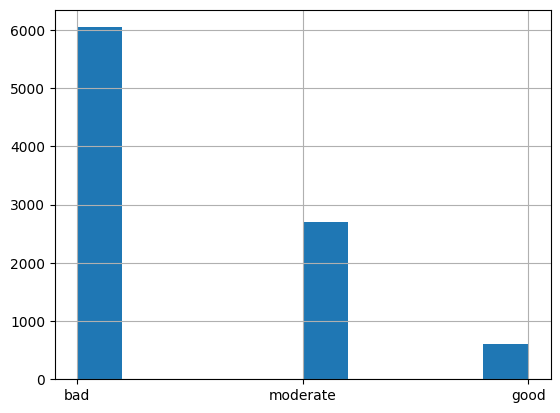

In [75]:
df['air_quality'].hist();

In [76]:
df.sample()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  day    year  quarter  month  weekday  week_year  CO(GT)_winsor  PT08.S1(CO)_winsor  C6H6(GT)_winsor  PT08.S2(NMHC)_winsor  NOx(GT)_winsor  PT08.S3(NOx)_winsor  NO2(GT)_winsor  PT08.S4(NO2)_winsor  PT08.S5(O3)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  month_winsor  weekday_winsor  week_year_winsor air_quality
559     1.3       1141.0       6.3          827.0     73.0         936.0     88.0        1488.0       1110.0  16.2  54.2  0.9933  3.0  2004.0      2.0    4.0      5.0       14.0            1.3              1141.0              6.3                 827.0            73.0                936.0            88.0               1488.0              1110.0      16.2       54.2     0.9933         3.0       2004.0             2.0           4.0             5.0              14.0    moderate

In [77]:
df_final = pd.concat([df_min_max[variables], df["air_quality"]], axis=1)

In [78]:
df_final.sample(3)

CO(GT)_winsor  PT08.S1(CO)_winsor  PT08.S4(NO2)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  weekday_winsor  NO2(GT)_winsor air_quality
6708       0.230024            0.436113             0.599253  0.665892   0.676205   0.525677    0.758688          0.0        1.000000        0.564575        0.456717    moderate
1146       0.572233            0.582059             0.722855  0.857677   0.140597   0.370274    0.962864          0.0        0.442507        0.356207        0.489785    moderate
3619       0.162076            0.203151             0.653685  0.934885   0.538245   1.000000    0.548765          0.0        0.756471        1.000000        0.123079        good

In [79]:
NUMERICAL_FEATURES_FINAL = list(df_final.select_dtypes(include=['float64','float32', 'int64', 'int32']).columns)

In [80]:
def UVA_numeric_with_categorical(data, var_group, categorical_var):
    """
    Univariate_Analysis_numeric_with_categorical
    Takes a group of numerical variables (INTEGER and FLOAT) and a categorical variable,
    and plots/prints all the descriptives and properties along with KDE for each category.

    Parameters:
    data: pd.DataFrame - The dataset containing the variables.
    var_group: list - A list of numerical variable names to analyze.
    categorical_var: str - The name of the categorical variable to group by.

    Runs a loop: calculates all the descriptives of the i(th) variable within each category
    and plots/prints it.
    """
    
    categories = data[categorical_var].unique()
    num_categories = len(categories)
    size = len(var_group)
    plt.figure(figsize=(7 * size, 4 * num_categories), dpi=100)

    # Looping for each numerical variable
    for j, num_var in enumerate(var_group):
        for k, cat in enumerate(categories):
            subset = data[data[categorical_var] == cat]
            
            # Calculating descriptives of the variable within the category
            mini = subset[num_var].min()
            maxi = subset[num_var].max()
            ran = maxi - mini
            mean = subset[num_var].mean()
            median = subset[num_var].median()
            st_dev = subset[num_var].std()
            skew = subset[num_var].skew()
            kurt = subset[num_var].kurtosis()

            # Calculating points of standard deviation
            points = mean - st_dev, mean + st_dev

            # Plotting the variable with every information
            plt.subplot(num_categories, size, k * size + j + 1)
            sns.kdeplot(x=subset[num_var], shade=True)
            sns.lineplot(x=points, y=[0, 0], color="black", label="std_dev")
            sns.scatterplot(x=[mini, maxi], y=[0, 0], color="orange", label="min/max")
            sns.scatterplot(x=[mean], y=[0], color="red", label="mean")
            sns.scatterplot(x=[median], y=[0], color="blue", label="median")
            plt.xlabel(f"{num_var} ({cat})", fontsize=12)
            plt.ylabel("Density")
            plt.title(
                f"{categorical_var} = {cat}\nwithin 1 std_dev = {round(points[0], 2), round(points[1], 2)};"
                f" kurtosis = {round(kurt, 2)}; skew = {round(skew, 2)};\n"
                f"range = {round(mini, 2), round(maxi, 2), round(ran, 2)};"
                f" mean = {round(mean, 2)}; median = {round(median, 2)}"
            )

    plt.tight_layout()
    plt.show()

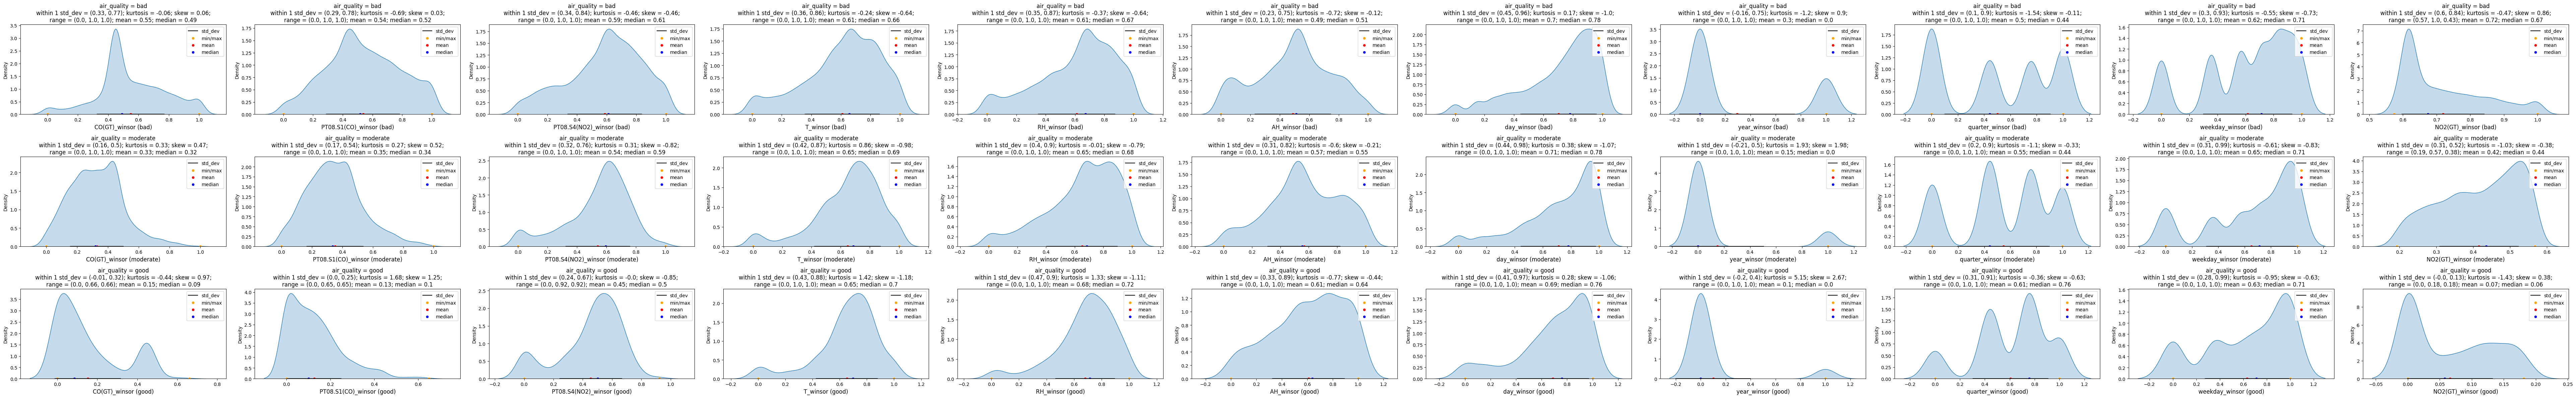

In [81]:
UVA_numeric_with_categorical(df_final, NUMERICAL_FEATURES_FINAL, 'air_quality')

In [90]:
def plot_features_with_categorical(df, features, categorical_var):
    size = len(features)
    
    # Create a figure with subplots in a single row
    fig, axes = plt.subplots(1, size, figsize=(7 * size, 5), dpi=100)

    # Ensure axes is iterable, even if there's only one subplot
    if size == 1:
        axes = [axes]
    
    # Loop through each feature and create a displot
    for i, feature in enumerate(features):
        sns.histplot(df, x=feature, hue=categorical_var, kde=True, fill=True, ax=axes[i])
        
        # Set the title and labels for each subplot
        axes[i].set_title(f'{feature} by {categorical_var}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

    # Adjust the layout to avoid overlap
    plt.tight_layout()
    plt.show()

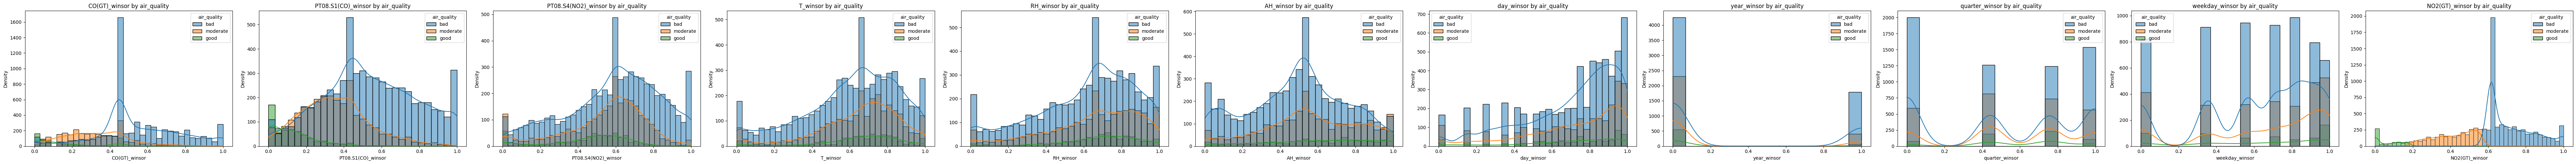

In [91]:
plot_features_with_categorical(df_final, NUMERICAL_FEATURES_FINAL, 'air_quality')

# Save Data Spliting - working and validation sets

It is essential to evaluate the model's performance accurately and ensure it generalizes well to new, unseen data. To achieve this, the dataset is typically split into three distinct sets: training, validation, and test sets.

In [82]:
RANDOM_SEED = 20230916

In [84]:
# Step 2: Split the data into training and testing sets
working_data, test_data = train_test_split(df_final, test_size=0.1, random_state=RANDOM_SEED)

# Step 3: Save the working and testing sets into separate CSV files
working = 'working.csv'
test = 'test.csv'

working_data.to_csv(working, index=False)
test_data.to_csv(test, index=False)

In [85]:
df_all = pd.concat([df_min_max[variables], df], axis=1)

In [86]:
df.shape, df_min_max.shape, df_all.shape

((9357, 37), (9357, 18), (9357, 48))

In [87]:
df_all

CO(GT)_winsor  PT08.S1(CO)_winsor  PT08.S4(NO2)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  weekday_winsor  NO2(GT)_winsor  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH   day    year  quarter  month  weekday  week_year  CO(GT)_winsor  PT08.S1(CO)_winsor  C6H6(GT)_winsor  PT08.S2(NMHC)_winsor  NOx(GT)_winsor  PT08.S3(NOx)_winsor  NO2(GT)_winsor  PT08.S4(NO2)_winsor  PT08.S5(O3)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  month_winsor  weekday_winsor  week_year_winsor air_quality
0          0.609095            0.783328             0.747936  0.546300   0.666742   0.354464     0.62198          0.0        0.000000        0.564575        0.636118     2.6       1360.0      11.9         1046.0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  10.0  2004.0      1.0    3.0      2.0       11.0            2.6              1360.0             11.9                1046.0           166.0               1056.0           113.0               1692.0              1268.0      13.6       48.9     0.7578        10.0       2004.0             1.0           3.0             2.0              11.0         bad
1          0.491514            0.711040             0.664232  0.536480   0.650206   0.329419     0.62198          0.0        0.000000        0.564575        0.521024     2.0       1292.0       9.4          955.0    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  10.0  2004.0      1.0    3.0      2.0       11.0            2.0              1292.0              9.4                 955.0           103.0               1174.0            92.0               1559.0               972.0      13.3       47.7     0.7255        10.0       2004.0             1.0           3.0             2.0              11.0    moderate
2          0.533136            0.826194             0.661605  0.487745   0.732847   0.348613     0.62198          0.0        0.000000        0.564575        0.641056     2.2       1402.0       9.0          939.0    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  10.0  2004.0      1.0    3.0      2.0       11.0            2.2              1402.0              9.0                 939.0           131.0               1140.0           114.0               1555.0              1074.0      11.9       54.0     0.7502        10.0       2004.0             1.0           3.0             2.0              11.0         bad
3          0.533136            0.799812             0.680497  0.453538   0.803184   0.376487     0.62198          0.0        0.000000        0.564575        0.679073     2.2       1376.0       9.2          948.0    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  10.0  2004.0      1.0    3.0      2.0       11.0            2.2              1376.0              9.2                 948.0           172.0               1092.0           122.0               1584.0              1203.0      11.0       60.0     0.7867        10.0       2004.0             1.0           3.0             2.0              11.0         bad
4          0.399226            0.689053             0.617949  0.461356   0.798715   0.378073     0.62198          0.0        0.000000        0.564575        0.650802     1.6       1272.0       6.5          836.0    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  10.0  2004.0      1.0    3.0      2.0       11.0            1.6              1272.0              6.5                 836.0           131.0               1205.0           116.0               1490.0              1110.0      11.2       59.6     0.7888        10.0       2004.0             1.0           3.0             2.0              11.0         bad
...             ...                 ...                  ...       ...        ...        ...         ...          ...             ...             ...     

In [88]:
all_data = 'all_data.csv'

In [89]:
df_all.to_csv(all_data, index=False)